## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
style.use('seaborn')
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Numeric, Text, Float

In [2]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [7]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [8]:
# Assign the Measurements class to a variable called `Measurements`
Measurements = Base.classes.measurements

In [9]:
# Assign the Stations class to a variable called `Stations`
Stations = Base.classes.stations

In [10]:
# Create a session
session = Session(engine)

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [11]:
# Latest Date
last_date =session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(last_date)

('2017-08-23',)


In [12]:
# Total dates
session.query(func.count(Measurements.date)).all()

[(18103)]

In [13]:
#Time Delta
# Query for  1 year before last_date using the datetime library
year_before_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_before_date)

2016-08-23


In [14]:
# query to retrieve the last 12 months of precipitation data
precipitation = session.query(Measurements.date, Measurements.prcp).filter(
                Measurements.date > year_before_date).order_by(Measurements.date).all()

In [15]:
#Load the query results into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


In [16]:
# set the index to the date column.
precipitation_df.set_index("date").head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


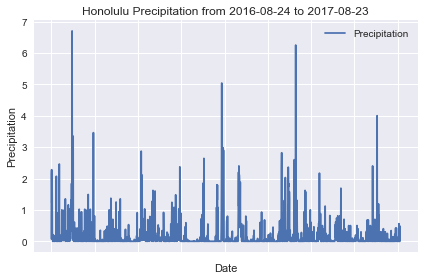

In [17]:
# Plot the results using the DataFrame `plot` method.
precipitation_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.title("Honolulu Precipitation from 2016-08-24 to 2017-08-23")
plt.tight_layout()
plt.show()

In [18]:
#Use Pandas to print the summary statistics for the precipitation data.
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [19]:
#Design a query to calculate the total number of stations.
stations_count = session.query(Measurements).group_by(Measurements.station).count()
stations_count

9

In [20]:
#Design a query to find the most active stations.
most_active_stations = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(
                       Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()
most_active_st = most_active_stations[0][0]
most_active_st_obs = most_active_stations[0][1]
print("Most active station was: ", most_active_st, "Temperature observations count: ", most_active_st_obs)

Most active station was:  USC00519281 Temperature observations count:  2772


In [21]:
#List the stations and observation counts in descending order
for station, count in most_active_stations:
    print("Station ", station, "had ", count,"temperature observations")

Station  USC00519281 had  2772 temperature observations
Station  USC00513117 had  2696 temperature observations
Station  USC00519397 had  2685 temperature observations
Station  USC00519523 had  2572 temperature observations
Station  USC00516128 had  2484 temperature observations
Station  USC00514830 had  1937 temperature observations
Station  USC00511918 had  1932 temperature observations
Station  USC00517948 had  683 temperature observations
Station  USC00518838 had  342 temperature observations


In [22]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
last_year_temp_obs = session.query(Measurements.station, Measurements.date, Measurements.tobs).filter(
                  Measurements.station == most_active_st).filter(
                  Measurements.date > year_before_date).order_by(Measurements.date).all()
    

In [23]:

last_year_temp_df = pd.DataFrame(last_year_temp_obs)
last_year_temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77
1,USC00519281,2016-08-25,80
2,USC00519281,2016-08-26,80
3,USC00519281,2016-08-27,75
4,USC00519281,2016-08-28,73


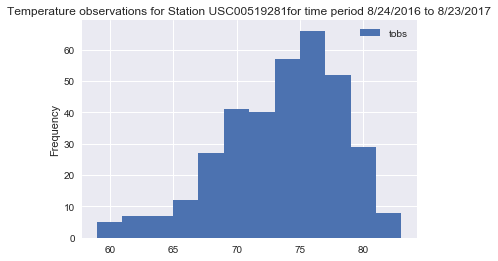

In [24]:
#Plot the results as a histogram with `bins=12`.
plt.hist(last_year_temp_df['tobs'],12)
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.title("Temperature observations for Station " + most_active_st + "for time period 8/24/2016 to 8/23/2017" )
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


In [25]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
#return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    max_min_avg_temp = session.query(
        func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).filter(
        Measurements.date > start_date).filter(Measurements.date < end_date).all()
    return max_min_avg_temp
test_avg = calc_temps('2016-05-05', '2016-06-06')
print(test_avg)
               

[(65, 73.59638554216868, 81)]


In [26]:
#Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year 
#(i.e. use "2017-01-01" if your trip start date was "2018-01-01")
trip_start = dt.date(2018,8,10)
trip_end = dt.date(2018,8,30)
trip_start_last_year = trip_start - dt.timedelta(days=365)
trip_end_last_year = trip_end - dt.timedelta(days=365)

trip_avg_last_year = calc_temps(trip_start_last_year, trip_end_last_year)
print(trip_avg_last_year)
print(len(trip_avg_last_year))

[(70, 78.6, 84)]
1


In [27]:
avg_df = pd.DataFrame({'tmin': [trip_avg_last_year[0][0]], 'avg': [trip_avg_last_year[0][1]], 'tmax': [trip_avg_last_year[0][2]]}, columns=['tmin','avg', 'tmax'])
avg_df


,tmin,avg,tmax
0,70,78.6,84


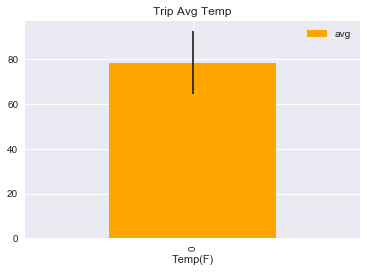

In [28]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

#x = range(0, len(trip_avg_last_year))
error = avg_df["tmax"].sub(avg_df['tmin'])
avg_df.plot.bar(y = 'avg',  yerr=error, align='center', color='orange')
plt.title("Trip Avg Temp")
plt.xlabel("Temp(F)")
plt.show()
        